# Load results from every run

In [10]:
import os

rootFolder: str = "results"

In [11]:
trainingResults: dict = {
    "yolov5nu_250_epochs_10_patience":
    {
        "platform": "jetson",
        "model": "yolov5n",
        "epochs": 250,
        "patience": 10,
        "dataset": "full",
        "training_time": 45.59, # in hours
        "optimizer": "auto",
        "batch-size": 4,
        "path": os.path.join(rootFolder, "yolov5nu_250_epochs_10_patience", "results.csv"),
    },
    "yolov8n_20_epochs": 
    {
        "model": "yolov8n",
        "platform": "kaggle",
        "epochs": 20,
        "patience": 100,
        "dataset": "full",
        "optimizer": "auto",
        "training_time": 0.32, # in hours
        "batch-size": 16,
        "path": os.path.join(rootFolder, "yolov8n_20_epochs", "runs", "detect", "train", "results.csv"),
    },
    "yolov11n_20_epochs":
    {
        "model": "yolov11n",
        "platform": "kaggle",
        "epochs": 20,
        "patience": 100,
        "dataset": "full",
        "optimizer": "auto",
        "training_time": 1.13, # in hours
        "batch-size": 16,
        "path": os.path.join(rootFolder, "yolov11n_20_epochs", "results", "runs", "detect", "train", "results.csv"),
    },
    "yolov11n_20_epochs_adam_optimizer":
    {
        "model": "yolov11n",
        "platform": "kaggle",
        "epochs": 20,
        "patience": 100,
        "dataset": "full",
        "optimizer": "adam",
        "batch-size": 16,
        #"training_time": 4.34, # in hours
        #"path": os.path.join(rootFolder, "yolov11n_20_epochs_adam_optimizer", "train", "results.csv"),
    },
    "yolov11n_20_epochs_reduced_dataset":
    {
        "model": "yolov11n",
        "platform": "gtx 1060",
        "epochs": 20,
        "patience": 100,
        "dataset": "reduced",
        "optimizer": "auto",
        "training_time": 0.39, # in hours.minutes
        "batch-size": 4,
        "path": os.path.join(rootFolder, "yolov11n_20_epochs_reduced_dataset", "detect", "train", "results.csv"),
    },
    "yolov11n_50_epochs_reduced_dataset":
    {
        "model": "yolov11n",
        "platform": "jetson",
        "epochs": 50,
        "patience": 100,
        "dataset": "reduced",
        "optimizer": "auto",
        "training_time": 1.38, # in hours.minutes
        "batch-size": 4,
        "path": os.path.join(rootFolder, "yolov11n_50_epochs_reduced_dataset", "detect", "train", "results.csv"),
    },
    "yolov11n_100_epochs":
    {
        "model": "yolov11n",
        "platform": "kaggle",
        "epochs": 100,
        "patience": 100,
        "dataset": "full",
        "optimizer": "auto",
        "training_time": 4.24, # in hours
        "batch-size": 16,
        "path": os.path.join(rootFolder, "yolov11n_100_epochs", "runs", "detect", "train", "results.csv"),
    },
    "yolov11n_250_epochs_10_patience_reduced_dataset":
    {
        "model": "yolov11n",
        "platform": "gtx 1060",
        "epochs": 250,
        "patience": 10,
        "dataset": "reduced",
        "optimizer": "auto",
        "training_time": 4.39, # in hours.minutes
        "batch-size": 4,
        "path": os.path.join(rootFolder, "yolov11n_250_epochs_10_patience_reduced_dataset", "detect", "train", "results.csv"),
    },
    "yolov11n_250_epochs_adam_optimizer":
    {
        "model": "yolov11n",
        "platform": "kaggle",
        "epochs": 250,
        "patience": 100,
        "dataset": "full",
        "optimizer": "adam",
        "batch-size": 16,
        #"training_time": 8.68, # in hours
        #"path": os.path.join(rootFolder, "yolov11n_250_epochs_adam_optimizer", "results.csv"),
    },
    "yolov11s_50_epochs":
    {
        "model": "yolov11s",
        "platform": "kaggle",
        "epochs": 50,
        "patience": 100,
        "dataset": "full",
        "optimizer": "auto",
        "training_time": 3.25, # in hours.minutes
        "batch-size": 16,
        "path": os.path.join(rootFolder, "yolov11s_50_epochs", "runs", "detect", "train", "results.csv"),
    },
    "yolov11s_250_epochs_10_patience_reduced_dataset":
    {
        "model": "yolov11s",
        "platform": "gtx 1060",
        "epochs": 250,
        "patience": 10,
        "dataset": "reduced",
        "optimizer": "auto",
        "training_time": 4.58, # in hours.minutes
        "batch-size": 4,
        "path": os.path.join(rootFolder, "yolov11s_250_epochs_10_patience_reduced_dataset", "detect", "train", "results.csv"),
    },
    "yolov11n_250_epochs_100_patience_reduced_dataset":
    {
        "model": "yolov11n",
        "platform": "gtx 1060",
        "epochs": 250,
        "patience": 100,
        "dataset": "reduced",
        "optimizer": "auto",
        "training_time": 8.3, # in hours.minutes
        "batch-size": 4,
        "path": os.path.join(rootFolder, "yolov11n_250_epochs_100_patience_reduced_dataset", "detect", "train", "results.csv"),
    },
}

## Check provided paths

In [12]:
for key, value in trainingResults.items():
    if "path" in value.keys():
        if not os.path.exists(value["path"]):
            print(f"Key {key} doesn't contain file path {value['path']}!")
    else:
        print(f"Key {key} does not contain path!")

Key yolov11n_20_epochs_adam_optimizer does not contain path!
Key yolov11n_250_epochs_adam_optimizer does not contain path!


## Plot the data

In [13]:
!pip install pandas
!pip install matplotlib
!pip install numpy

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Plot Processing time

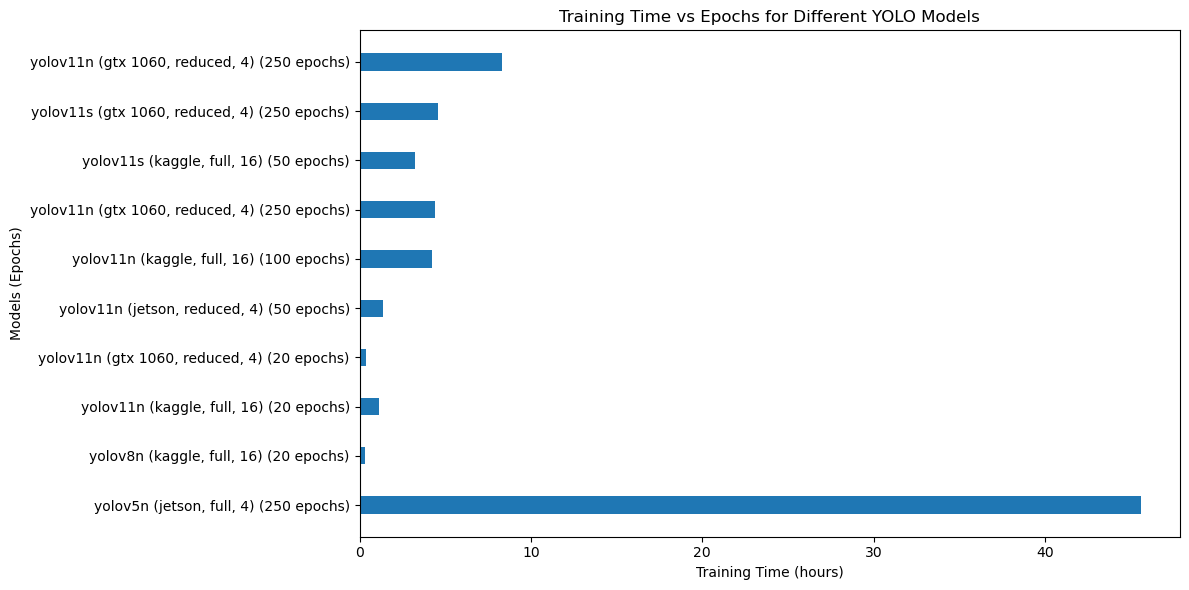

In [20]:
# Filter out the models with a defined training time
filtered_results = {key: value for key, value in trainingResults.items() if "training_time" in value}

# Prepare data for plotting
epochs = []
training_times = []
labels = []

for result in filtered_results.values():
    epochs.append(result["epochs"])
    training_times.append(result["training_time"])
    label = f"{result['model']} ({result['platform']}, {result['dataset']}, {result['batch-size']})"
    labels.append(label)

# Plot the data as a horizontal bar plot with number of epochs
plt.figure(figsize=(12, 6))
bar_width = 0.35
indices = range(len(epochs))

# Create horizontal bars
plt.barh(indices, training_times, height=0.35)

# Labeling
plt.ylabel('Models (Epochs)')
plt.xlabel('Training Time (hours)')
plt.title('Training Time vs Epochs for Different YOLO Models')

# Combine model name and number of epochs for y-axis labels
labels_with_epochs = [f"{label} ({epochs[i]} epochs)" for i, label in enumerate(labels)]

plt.yticks(indices, labels_with_epochs)
plt.tight_layout()

# Display the plot
plt.show()

## Plot Precision over epochs

yolov5nu_250_epochs_10_patience
yolov8n_20_epochs
yolov11n_20_epochs
yolov11n_20_epochs_reduced_dataset
yolov11n_50_epochs_reduced_dataset
yolov11n_100_epochs
yolov11n_250_epochs_10_patience_reduced_dataset
yolov11s_50_epochs
yolov11s_250_epochs_10_patience_reduced_dataset
yolov11n_250_epochs_100_patience_reduced_dataset


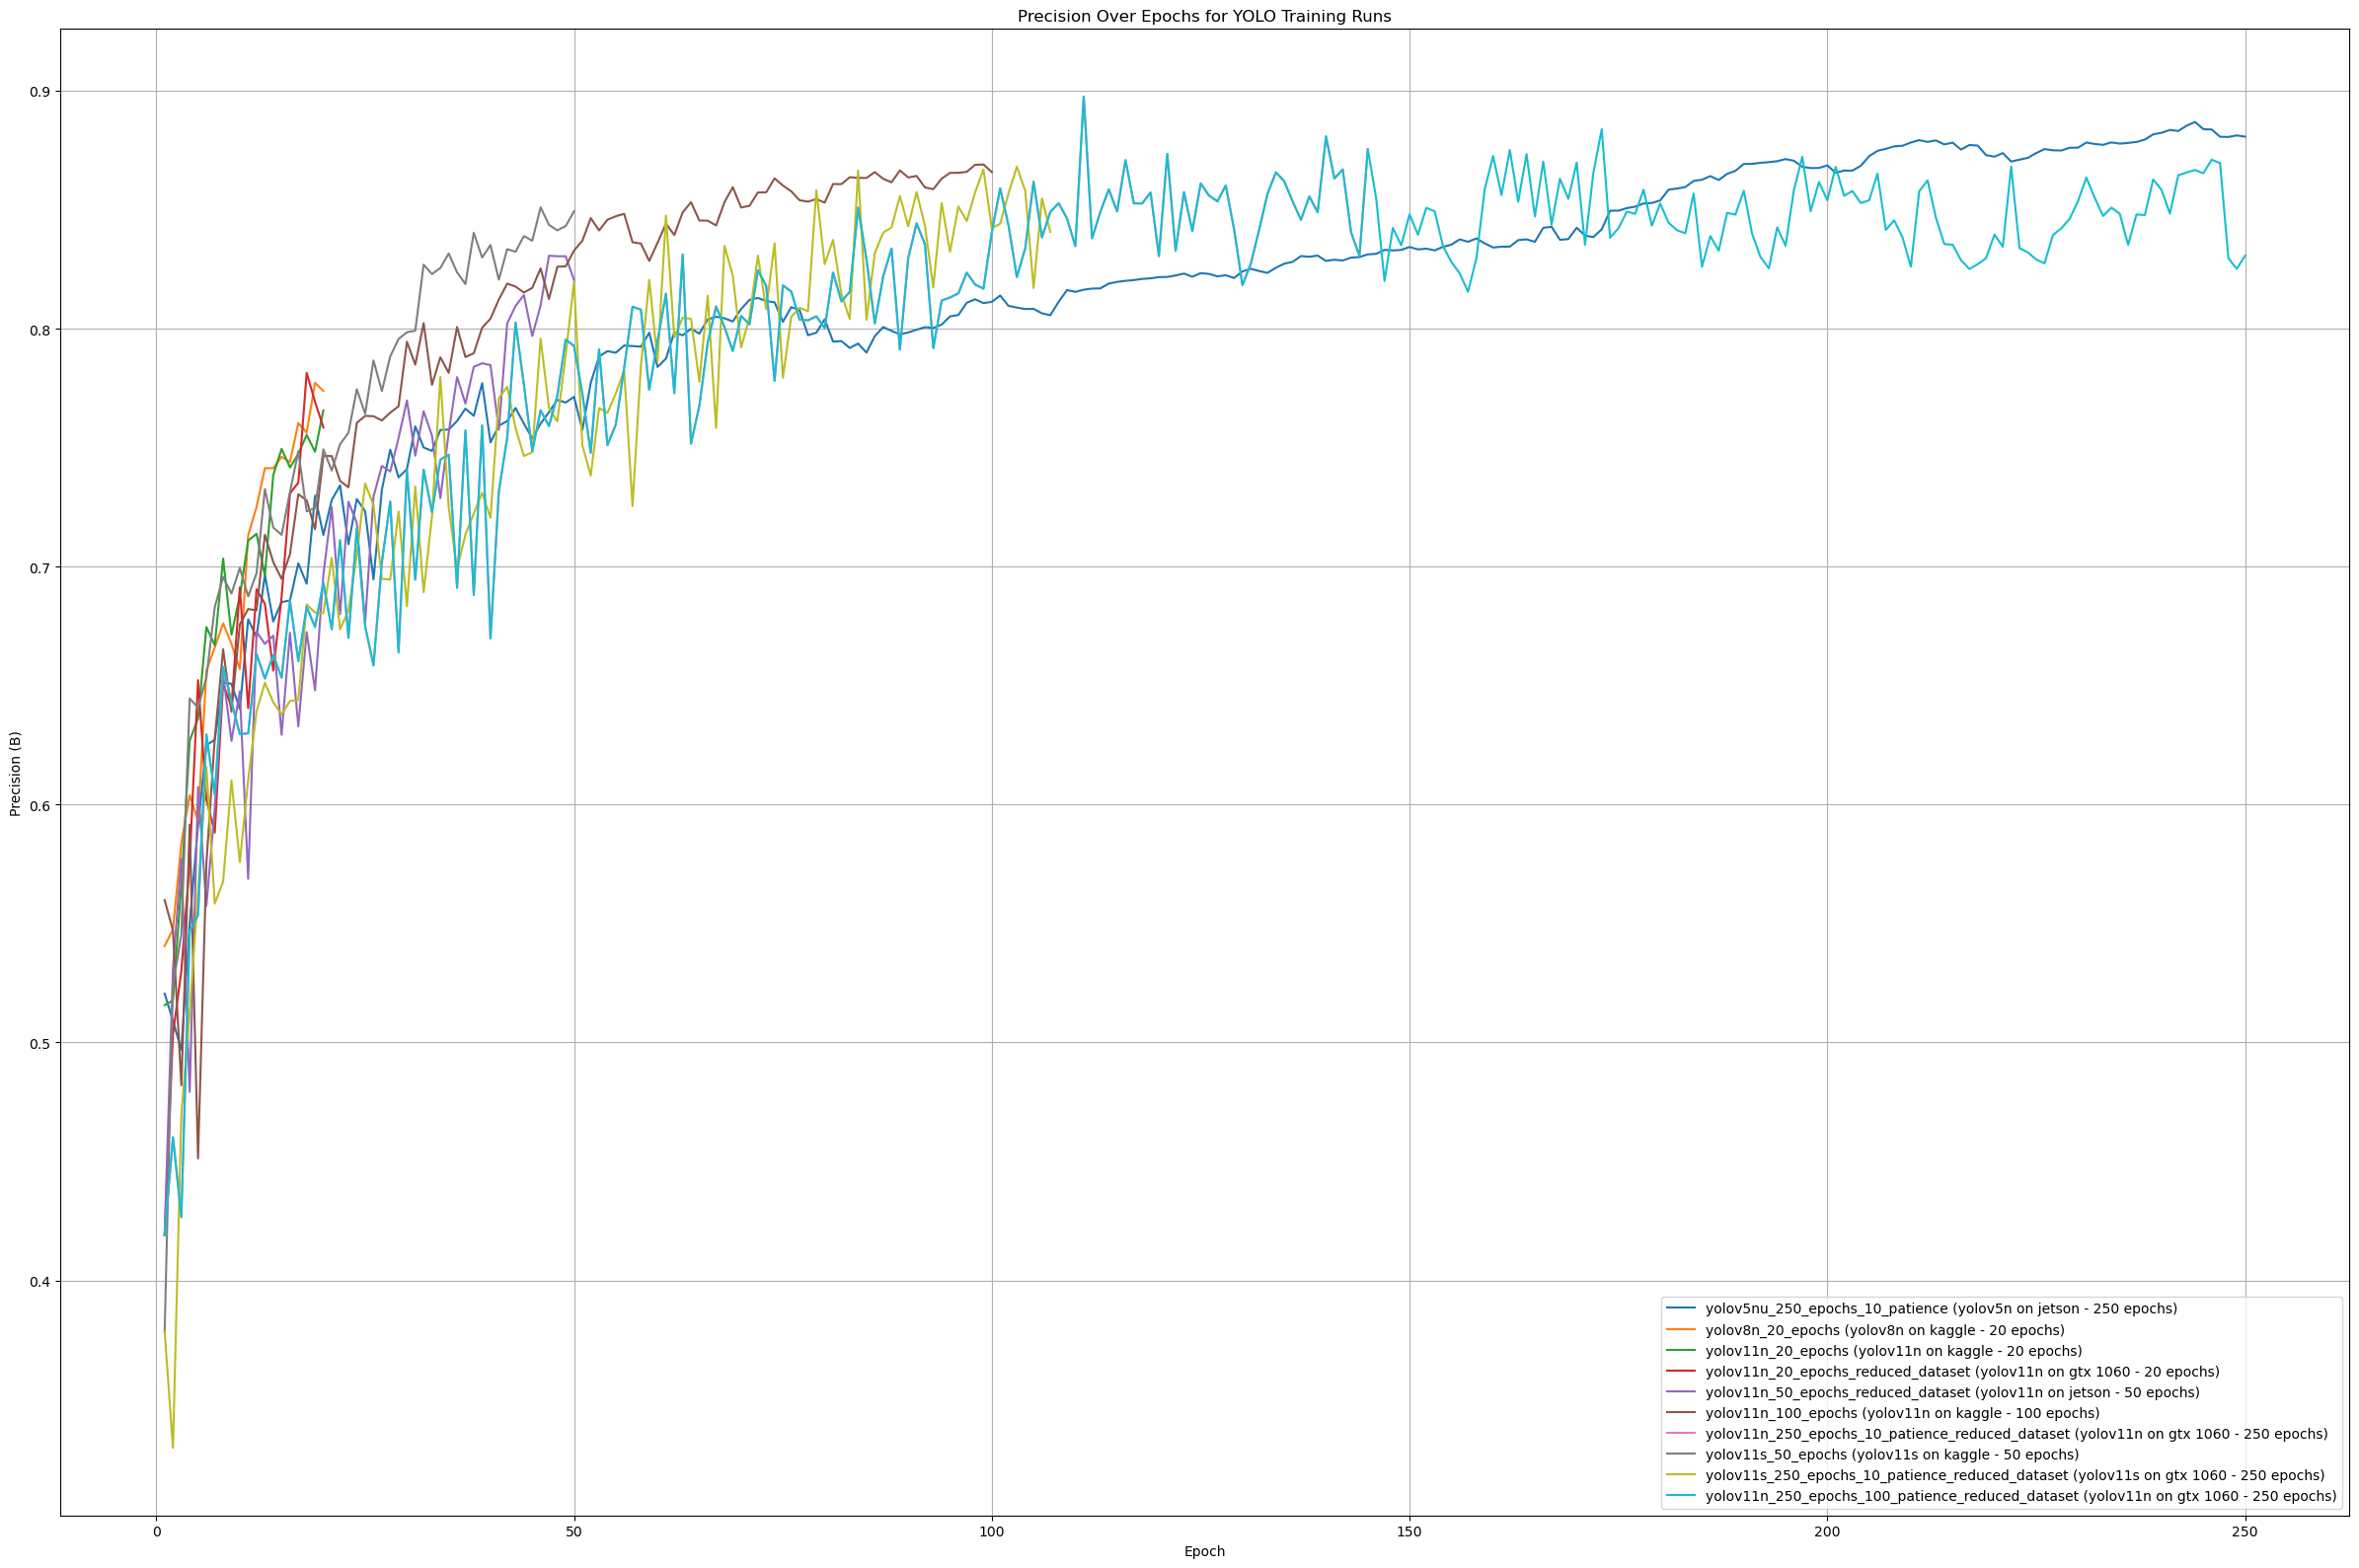

In [16]:
# Filter out entries with a defined 'path'
valid_entries = {key: val for key, val in trainingResults.items() if 'path' in val and os.path.exists(val['path'])}

# Initialize a plot
plt.figure(figsize=(24, 16))

# Process each valid entry
for key, details in valid_entries.items():
    print(key)
    try:
        # Read the CSV file
        df = pd.read_csv(details['path'])
        
        # Extract epoch and precision
        epochs = df['epoch']
        precision = df['metrics/precision(B)']
        
        # Generate a label
        label = f"{key} ({details['model']} on {details['platform']} - {details['epochs']} epochs)"
        
        # Plot precision over epochs
        plt.plot(epochs, precision, label=label)
    
    except Exception as e:
        print(f"Error processing {key}: {e}")

# Customize the plot
plt.title("Precision Over Epochs for YOLO Training Runs")
plt.xlabel("Epoch")
plt.ylabel("Precision (B)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


## Plot Recall over Epochs

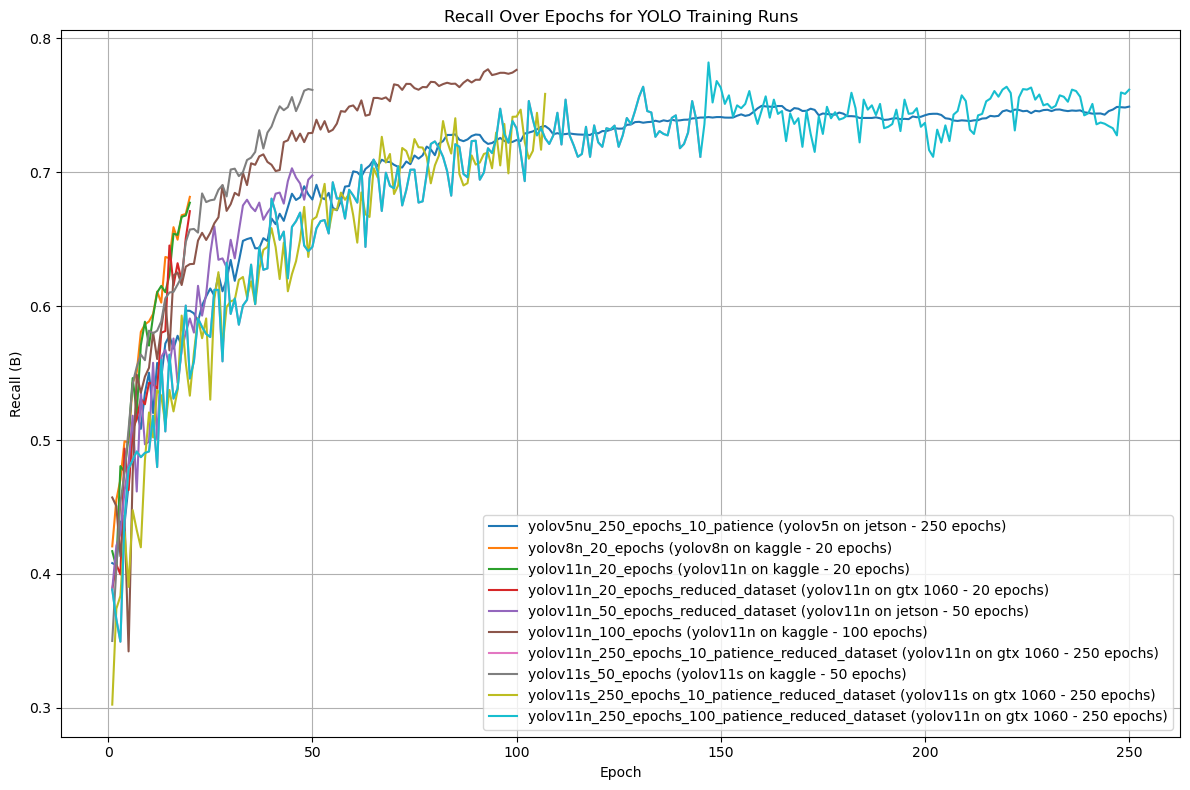

In [17]:
# Filter out entries with a defined 'path'
valid_entries = {key: val for key, val in trainingResults.items() if 'path' in val and os.path.exists(val['path'])}

# Initialize a plot
plt.figure(figsize=(12, 8))

# Process each valid entry
for key, details in valid_entries.items():
    try:
        # Read the CSV file
        df = pd.read_csv(details['path'])
        
        # Extract epoch and recall
        epochs = df['epoch']
        recall = df['metrics/recall(B)']
        
        # Generate a label
        label = f"{key} ({details['model']} on {details['platform']} - {details['epochs']} epochs)"
        
        # Plot recall over epochs
        plt.plot(epochs, recall, label=label)
    
    except Exception as e:
        print(f"Error processing {key}: {e}")

# Customize the plot
plt.title("Recall Over Epochs for YOLO Training Runs")
plt.xlabel("Epoch")
plt.ylabel("Recall (B)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## Plot Precision-Recall over Epochs

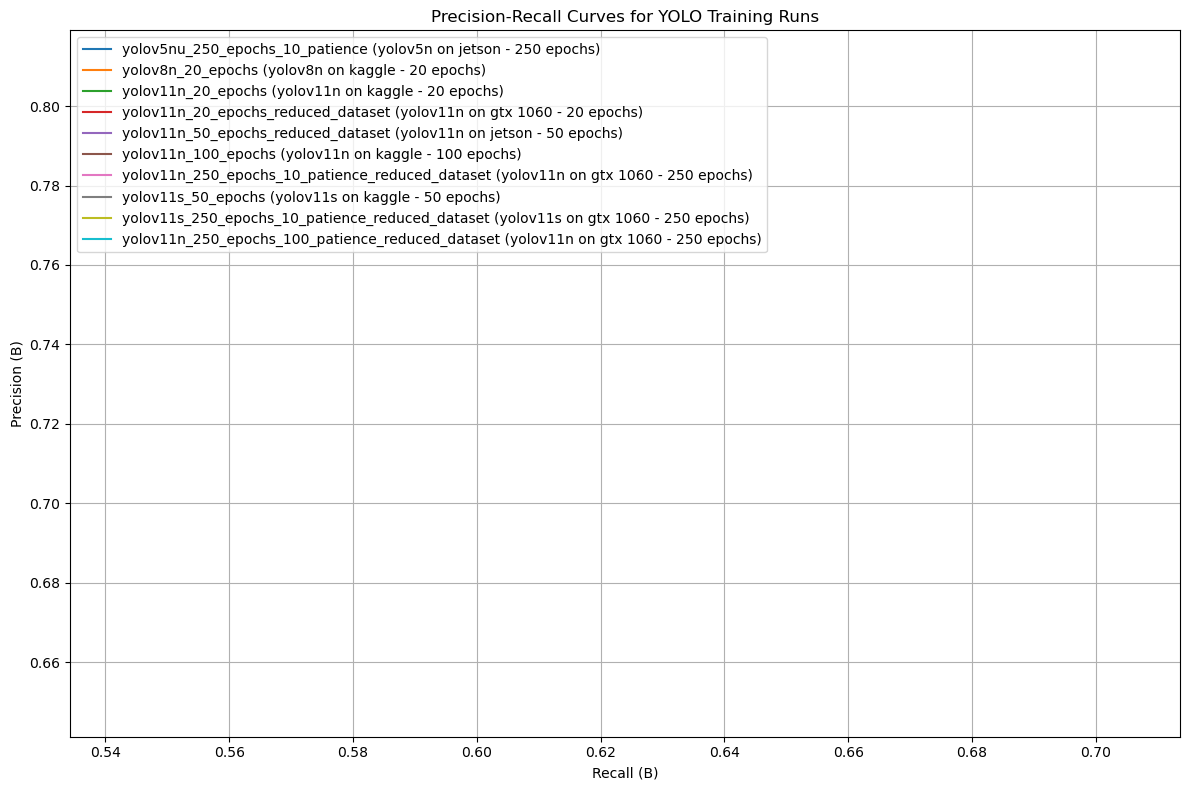

In [18]:
# Filter out entries with a defined 'path'
valid_entries = {key: val for key, val in trainingResults.items() if 'path' in val and os.path.exists(val['path'])}

# Initialize a plot
plt.figure(figsize=(12, 8))

# Process each valid entry
for key, details in valid_entries.items():
    try:
        # Read the CSV file
        df = pd.read_csv(details['path'])
        
        # Extract precision and recall
        precision = df['metrics/precision(B)']
        recall = df['metrics/recall(B)']
        avg_precision = precision.mean()
        avg_recall = recall.mean()

        
        # Generate a label
        label = f"{key} ({details['model']} on {details['platform']} - {details['epochs']} epochs)"
        
        # Plot precision-recall curve
        plt.plot(avg_recall, avg_precision, label=label)
    
    except Exception as e:
        print(f"Error processing {key}: {e}")

# Customize the plot
plt.title("Precision-Recall Curves for YOLO Training Runs")
plt.xlabel("Recall (B)")
plt.ylabel("Precision (B)")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

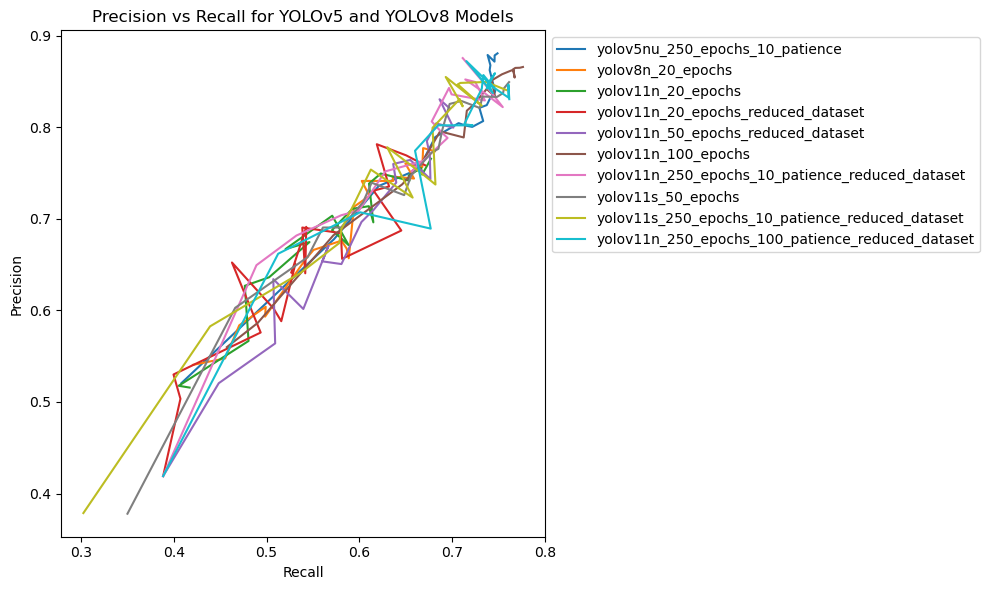

In [19]:
# Filter out entries with a defined 'path'
valid_entries = {key: val for key, val in trainingResults.items() if 'path' in val and os.path.exists(val['path'])}

# Initialize lists to store precision, recall, and labels for plotting
precision_list = []
recall_list = []
labels = []

# Determine the minimum number of epochs across all runs with defined paths
min_epochs = float('inf')

# First, iterate through the dictionary to find runs with a defined path and determine the minimum epochs
for key, value in valid_entries.items():
    if "path" in value and os.path.exists(value["path"]):
        # Load the CSV data for the current run
        df = pd.read_csv(value["path"])
        
        # Update the minimum number of epochs
        min_epochs = min(min_epochs, len(df))
        
# Now, iterate again to extract and interpolate the data
for key, value in valid_entries.items():
    if "path" in value and os.path.exists(value["path"]):
        # Load the CSV data for the current run
        df = pd.read_csv(value["path"])
        
        # Extract precision and recall values from the 'metrics/precision(B)' and 'metrics/recall(B)' columns
        precision = df['metrics/precision(B)'].values
        recall = df['metrics/recall(B)'].values
        
        # Interpolate precision and recall values to match the minimum number of epochs
        epochs = np.arange(len(df))  # Epochs based on the current data
        new_epochs = np.linspace(0, len(df) - 1, min_epochs)  # New epoch range (minimum number of epochs)
        
        # Interpolate precision and recall to the same number of points
        precision_interp = np.interp(new_epochs, epochs, precision)
        recall_interp = np.interp(new_epochs, epochs, recall)
        
        # Add interpolated precision, recall, and label for this run
        precision_list.append(precision_interp)
        recall_list.append(recall_interp)
        labels.append(key)

# Create a plot for Precision vs Recall
plt.figure(figsize=(10, 6))

# Plot the precision vs recall for each run
for i in range(len(precision_list)):
    plt.plot(recall_list[i], precision_list[i], label=labels[i])

# Set plot labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall for YOLOv5 and YOLOv8 Models')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()